# Modeling Saturation in Ferromagnetic Cores - Choice of B-H curve
What expression to use for the B-H curve?

In [11]:
using LinearAlgebra
using Plots

## Section 1:/ Introduction 
We explore various ways to model the saturation of ferromagnetic cores. 

## Section 2:/ Analytical Three Parameter Model 
$ \mu = \mu_0 \, \mu_r 
 = \mu_0 \left( \mu_{rmin} + \frac{\mu_{rmax}}{1 + C \, normB^2} \right) $ 
and thus 
$ \frac{d\mu}{d\,normB^2} = \mu_0 \mu_{rmax} \frac{-normB^2}{(1 + C \, normB^2)^2} $ 

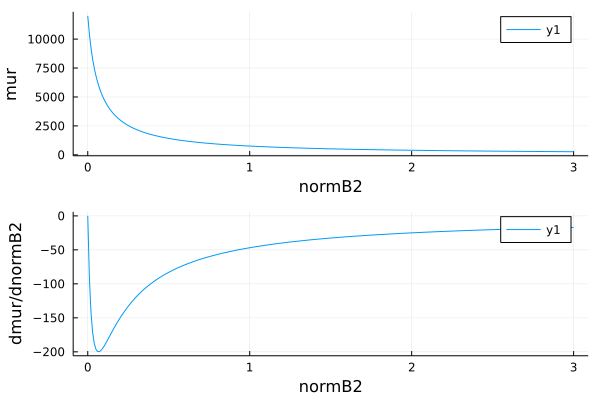

In [20]:
function mur(normB2,murmin,murmax,C)
    return murmin + murmax / (1 + C * normB2)
end
    
function dmurdnormB2(normB2,murmin,murmax,C)
    return  murmax*(-normB2)/ (1 + C * normB2)^2
end

# set constants 
murmin = 7 
murmax = 12000 
C = 15 

# set range in normB2  
normB2vec = Vector(0:0.01:3)

# compute mu 
murvec         = mur.(normB2vec,murmin,murmax,C)
dmurdnormB2vec = dmurdnormB2.(normB2vec,murmin,murmax,C)

p1=plot(normB2vec, murvec, xlabel="normB2", ylabel="mur")
p2=plot(normB2vec, dmurdnormB2vec, xlabel="normB2", ylabel="dmur/dnormB2")
plot(p1,p2, layout = (2,1))

## Section 3:/ First Model from Data 